#**Act 2. Multicolinealidad**

###Importar librerías

In [242]:
!pip install ucimlrepo

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

##**Etapa 1:**

###Cargar dataset de abulones

In [244]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# data combined
df_combined = pd.concat([X, y], axis=1)

# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)

{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Life Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscop

In [245]:
X = X.iloc[:, 1:]
print(X.to_numpy())
print(y.to_numpy())

[[0.455 0.365 0.095 ... 0.225 0.101 0.15 ]
 [0.35  0.265 0.09  ... 0.1   0.049 0.07 ]
 [0.53  0.42  0.135 ... 0.257 0.141 0.21 ]
 ...
 [0.6   0.475 0.205 ... 0.525 0.287 0.308]
 [0.625 0.485 0.15  ... 0.531 0.261 0.296]
 [0.71  0.555 0.195 ... 0.946 0.377 0.495]]
[[15]
 [ 7]
 [ 9]
 ...
 [ 9]
 [10]
 [12]]


###Ajustar el modelo de mínimos cuadrados ordinarios

In [246]:
X = sm.add_constant(X)
model = sm.OLS(y, X)
fitted_model = model.fit()
print(fitted_model.params)

const              2.985154
Length            -1.571897
Diameter          13.360916
Height            11.826072
Whole_weight       9.247414
Shucked_weight   -20.213913
Viscera_weight    -9.829675
Shell_weight       8.576242
dtype: float64


###Calcular con los datos originales el valor de R^2 y los parámetros.

In [247]:
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     665.2
Date:                Sat, 21 Oct 2023   Prob (F-statistic):               0.00
Time:                        00:00:26   Log-Likelihood:                -9250.0
No. Observations:                4177   AIC:                         1.852e+04
Df Residuals:                    4169   BIC:                         1.857e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.9852      0.269     11.

###Buscar los puntos leverage

In [248]:
influence = fitted_model.get_influence()

[0.001 0.001 0.001 ... 0.002 0.001 0.003]


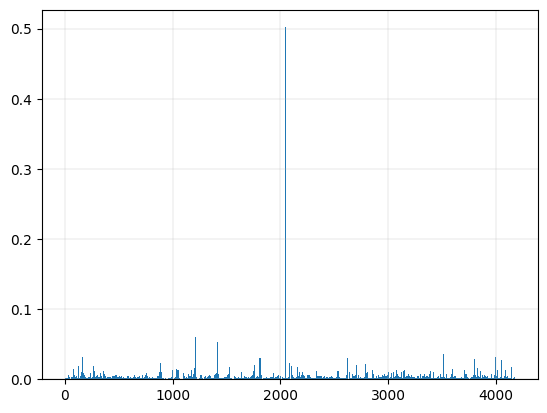

In [249]:
H_diag = influence.hat_matrix_diag
print(H_diag)

plt.bar(df_combined.index, H_diag, width = 10)
plt.grid(linewidth = 0.2)
plt.show()

In [250]:
mapping = sorted(list(enumerate(H_diag)), key = lambda item: item[1], reverse = True)
max_value_idxs = [item[0] for item in mapping]

print('Top leverage values: ')
print([item[1] for item in mapping][:3])

print('\nSample indexes with more leverage:')
print(df_combined.iloc[max_value_idxs])

Top leverage values: 
[0.5019723528421322, 0.05960859244317343, 0.05295671927323318]

Sample indexes with more leverage:
     Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
2051   F   0.455     0.355   1.130        0.5940          0.3320   
1210   I   0.185     0.375   0.120        0.4645          0.1960   
1417   M   0.705     0.565   0.515        2.2100          1.1075   
3518   M   0.710     0.570   0.195        1.3480          0.8985   
163    F   0.725     0.560   0.210        2.1410          0.6500   
...   ..     ...       ...     ...           ...             ...   
837    I   0.475     0.365   0.125        0.5465          0.2290   
600    I   0.535     0.420   0.145        0.9260          0.3980   
3555   M   0.535     0.415   0.135        0.7800          0.3165   
2744   M   0.480     0.375   0.120        0.5895          0.2535   
488    M   0.540     0.420   0.135        0.8075          0.3485   

      Viscera_weight  Shell_weight  Rings  
2051          0.11

###Buscar los puntos influyentes, outliers

In [251]:
#  suppress scientific notation
np.set_printoptions(suppress = True)

# obtain Cook's distance from each observation
cooks_dist = influence.cooks_distance[0]

print(cooks_dist[:10])

[0.001 0.    0.    0.    0.    0.    0.002 0.    0.    0.001]


In [252]:
summary_cooks = influence.summary_frame()
print(summary_cooks)

      dfb_const  dfb_Length  dfb_Diameter  dfb_Height  dfb_Whole_weight  \
0      0.013647   -0.032927      0.045769   -0.048025          0.010240   
1     -0.001956    0.000391      0.000189    0.000044          0.000010   
2      0.009360    0.001597     -0.007949    0.001964         -0.006124   
3      0.002439   -0.008192      0.008150    0.001118         -0.000097   
4      0.000109   -0.000049      0.000021   -0.000022          0.000027   
...         ...         ...           ...         ...               ...   
4172  -0.001359   -0.001517      0.002022    0.001833         -0.002014   
4173  -0.001104    0.002819     -0.002169   -0.001326         -0.000042   
4174   0.002614    0.006257     -0.002471   -0.024792          0.004487   
4175  -0.001575    0.001016     -0.000027   -0.001537         -0.003201   
4176   0.006267    0.000073     -0.003912   -0.000831          0.004942   

      dfb_Shucked_weight  dfb_Viscera_weight  dfb_Shell_weight       cooks_d  \
0              -0.0

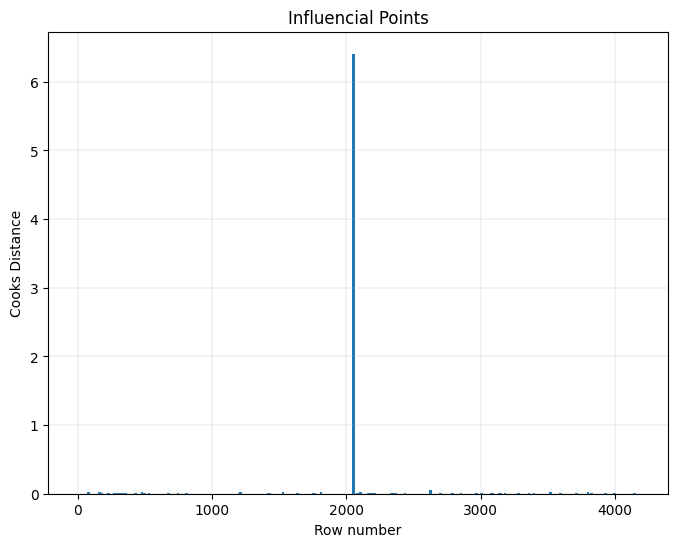

In [253]:
plt.figure(figsize = (8, 6))
plt.bar(df_combined.index, cooks_dist, width = 20)
plt.xlabel('Row number')
plt.ylabel('Cooks Distance')
plt.title('Influencial Points')
plt.grid(linewidth = 0.2)

In [254]:
mapping = sorted(list(enumerate(cooks_dist)), key=lambda item:item[1], reverse=True)

max_value_idxs = [item[0] for item in mapping]

print("Top cook's distance values:")
print([item[1] for item in mapping][:3])

print("Top Sample indexes with more distance values: ")
print(df_combined.iloc[max_value_idxs])

Top cook's distance values:
[6.409299513058319, 0.04919146658760428, 0.031621158221939866]
Top Sample indexes with more distance values: 
     Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
2051   F   0.455     0.355   1.130        0.5940          0.3320   
2627   I   0.275     0.205   0.070        0.1055          0.4950   
480    F   0.700     0.585   0.185        1.8075          0.7055   
3518   M   0.710     0.570   0.195        1.3480          0.8985   
1528   M   0.725     0.575   0.240        2.2100          1.3510   
...   ..     ...       ...     ...           ...             ...   
2522   M   0.545     0.450   0.150        0.8795          0.3870   
2369   I   0.560     0.440   0.170        0.9445          0.3545   
1272   I   0.475     0.355   0.100        0.5035          0.2535   
1022   F   0.640     0.500   0.170        1.5175          0.6930   
897    I   0.265     0.195   0.060        0.0920          0.0345   

      Viscera_weight  Shell_weight  Rings  
2

In [255]:
mean_cooks = np.mean(cooks_dist)
mean_cooks

0.0018730877579285728

In [256]:
mean_cooks_list = [4 * mean_cooks for _ in df_combined.index]
cooks_threshold = [4 / len(cooks_dist) for _ in df_combined.index]

###Graficando las distancias de los puntos


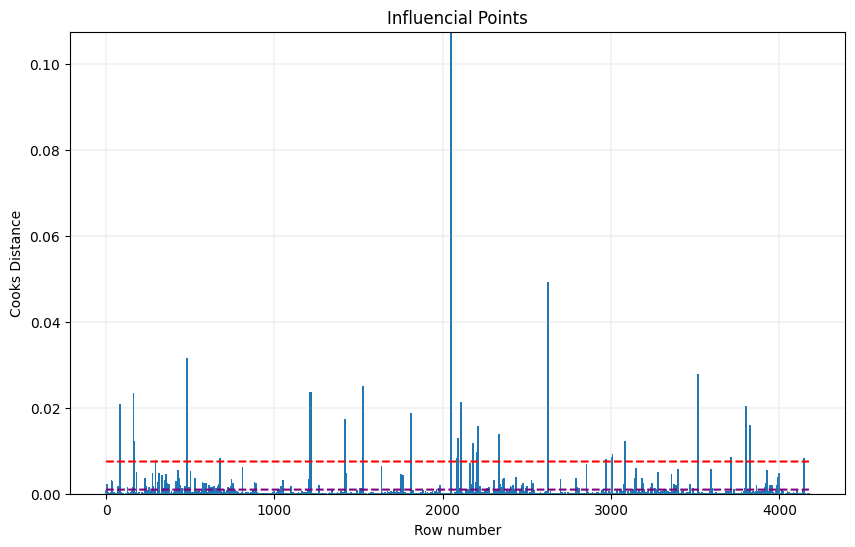

In [257]:
plt.figure(figsize = (10,6))
plt.bar(df_combined.index, cooks_dist, width = 10)
plt.plot(df_combined.index, mean_cooks_list, color = 'red', linestyle = '--', linewidth = 1.5)
plt.plot(df_combined.index, cooks_threshold, color = 'purple', linestyle = '--', linewidth = 1.5)

plt.xlabel('Row number')
plt.ylabel('Cooks Distance')
plt.title('Influencial Points')
plt.ylim(top = max(mean_cooks_list + cooks_threshold) + 1e-1)
plt.grid(linewidth = 0.2)

In [258]:
# Influencial points
influencial_points = df_combined.index[cooks_dist > 4 / len(cooks_dist)]
print(influencial_points)

df_combined.iloc[influencial_points,:].head(10)

Int64Index([   6,    9,   32,   33,   36,   67,   72,   81,   83,   85,
            ...
            3944, 3958, 3987, 3992, 3993, 3996, 4017, 4140, 4145, 4148],
           dtype='int64', length=253)


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19
32,M,0.665,0.525,0.165,1.3380,0.5515,0.3575,0.350,18
33,F,0.680,0.550,0.175,1.7980,0.8150,0.3925,0.455,19
36,F,0.540,0.475,0.155,1.2170,0.5305,0.3075,0.340,16
67,F,0.595,0.495,0.185,1.2850,0.4160,0.2240,0.485,13
72,F,0.595,0.475,0.170,1.2470,0.4800,0.2250,0.425,20
81,M,0.620,0.510,0.175,1.6150,0.5105,0.1920,0.675,12
83,M,0.595,0.475,0.160,1.3175,0.4080,0.2340,0.580,21
85,F,0.570,0.465,0.180,1.2950,0.3390,0.2225,0.440,12


In [259]:
noninfluencial_point = df_combined.index[cooks_dist < 4/len(cooks_dist)]
print(noninfluencial_point)

df_combined.iloc[noninfluencial_point,:].head(10)

Int64Index([   0,    1,    2,    3,    4,    5,    7,    8,   10,   11,
            ...
            4167, 4168, 4169, 4170, 4171, 4172, 4173, 4174, 4175, 4176],
           dtype='int64', length=3924)


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
10,F,0.525,0.380,0.140,0.6065,0.1940,0.1475,0.210,14
11,M,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.135,10


In [260]:
# Detect outliers using z-score
up_lim = X.mean() + 3 * X.std()
dw_lim = X.mean() - 3 * X.std()

print('Upper limit: ',  up_lim)
print('\nLower limit: ', dw_lim)

print('\nNumber of outlier Samples: ', X[(X > up_lim) | (X < dw_lim)].shape)

Upper limit:  const             1.000000
Length            0.884271
Diameter          0.705601
Height            0.264998
Whole_weight      2.299909
Shucked_weight    1.025256
Viscera_weight    0.509436
Shell_weight      0.656439
dtype: float64

Lower limit:  const             1.000000
Length            0.163713
Diameter          0.110162
Height            0.014035
Whole_weight     -0.642425
Shucked_weight   -0.306521
Viscera_weight   -0.148249
Shell_weight     -0.178777
dtype: float64

Number of outlier Samples:  (4177, 8)


In [261]:
# Detect outliers using percentiles
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
iqr = Q3 - Q1

print('Q1: ', Q1)
print('\nQ3: ', Q3)
print('\nIQR: ', iqr)

outlier_iqr = (X < Q1 -1.5 * iqr) | (X > Q3 + 1.5 * iqr)
print('\nNumber of outlier Samples: ', X[outlier_iqr].shape)

Q1:  const             1.0000
Length            0.4500
Diameter          0.3500
Height            0.1150
Whole_weight      0.4415
Shucked_weight    0.1860
Viscera_weight    0.0935
Shell_weight      0.1300
Name: 0.25, dtype: float64

Q3:  const             1.000
Length            0.615
Diameter          0.480
Height            0.165
Whole_weight      1.153
Shucked_weight    0.502
Viscera_weight    0.253
Shell_weight      0.329
Name: 0.75, dtype: float64

IQR:  const             0.0000
Length            0.1650
Diameter          0.1300
Height            0.0500
Whole_weight      0.7115
Shucked_weight    0.3160
Viscera_weight    0.1595
Shell_weight      0.1990
dtype: float64

Number of outlier Samples:  (4177, 8)


Al evaluar el z-score, identificamos que los atributos 'Whole_weight' y 'Shucked_weight' destacan como posibles valores atípicos, dado que muestran desviaciones notables con respecto a la media. Esto sugiere que estos dos atributos podrían contener observaciones inusuales en el conjunto de datos, lo que merece una atención especial al analizar su influencia en el conjunto de datos en general.

###Realiza una transformación para lidiar con los outliers

In [326]:
# Escalado min-max
from sklearn.preprocessing import MinMaxScaler

X = df_combined[["Length",	"Diameter",	"Height",	"Whole_weight",	"Shucked_weight",
        "Viscera_weight",	"Shell_weight"]]

y = df_combined["Rings"]

scaler = MinMaxScaler(feature_range= (-1, 1))

# Compute the mean and std to be used for later scaling
scaler.fit(X, y)

# Per feature maximum
print('Max values: ', scaler.data_max_)

# Scale features of X according to feature range
print('\nTransformation Step: ')
x_transform = scaler.transform(X)
print(x_transform, '\n')

Max values:  [0.815 0.65  1.13  2.825 1.488 0.76  1.005]

Transformation Step: 
[[ 0.027  0.042 -0.832 ... -0.699 -0.735 -0.704]
 [-0.257 -0.294 -0.841 ... -0.868 -0.874 -0.863]
 [ 0.23   0.227 -0.761 ... -0.656 -0.629 -0.584]
 ...
 [ 0.419  0.412 -0.637 ... -0.295 -0.244 -0.389]
 [ 0.486  0.445 -0.735 ... -0.287 -0.314 -0.413]
 [ 0.716  0.681 -0.655 ...  0.27  -0.01  -0.016]] 



In [327]:
# Normalizacion z-score
from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler()

# Compute the mean and std to be used for later scaling
scaler2.fit(X, y)

# The mean value for each feature in the training set
print('Means: ', scaler2.mean_)

# Perform standardization by centering and scaling
print('\nTransformation Step:')
x_transform2 = scaler2.transform(X)
print(x_transform2, '\n')

Means:  [0.524 0.408 0.14  0.829 0.359 0.181 0.239]

Transformation Step:
[[-0.575 -0.432 -1.064 ... -0.608 -0.726 -0.638]
 [-1.449 -1.44  -1.184 ... -1.171 -1.205 -1.213]
 [ 0.05   0.122 -0.108 ... -0.463 -0.357 -0.207]
 ...
 [ 0.633  0.676  1.566 ...  0.749  0.975  0.497]
 [ 0.841  0.777  0.251 ...  0.773  0.734  0.411]
 [ 1.549  1.483  1.327 ...  2.641  1.787  1.84 ]] 



###Calcula de nuevo el valor de R^2 y los parámetros obtenidos, comparar

In [333]:
X = sm.add_constant(x_transform2)

# Create the OLS model
model = sm.OLS(y, X)

# Fit the model
fitted_model = model.fit()

# Print the summary of the regression results
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     665.2
Date:                Sat, 21 Oct 2023   Prob (F-statistic):               0.00
Time:                        02:35:05   Log-Likelihood:                -9250.0
No. Observations:                4177   AIC:                         1.852e+04
Df Residuals:                    4169   BIC:                         1.857e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.9337      0.034    289.481      0.0

Aunque el valor de R^2 se mantiene constante en comparación con el valor inicial, es importante destacar una diferencia significativa en los coeficientes. Observamos que estos coeficientes han experimentado una notable reducción en sus magnitudes. La disminución en los valores de los coeficientes indica que, aunque el modelo sigue siendo igual de bueno en predecir, ahora todas las variables tienen menos peso en las predicciones. Esto podría significar que el modelo es más simple y que no depende tanto de variables específicas para hacer sus predicciones.

##**Etapa 2**:

###Busca multicolinealidad en los datos usando VIF

In [269]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# compute the vif for all given features
def compute_vif(considered_features):
  # the independent variable set
  X = df_combined[considered_features].copy()

  # the calculation of variance inflation requires a constant
  X['intercept'] = 1

  # VIF dataframe
  vif_data = pd.DataFrame()
  vif_data['feature'] = X.columns

  # calculating VIF for each feature
  vif_data['VIF'] = [variance_inflation_factor(X.values, i)
                     for i in range(len(X.columns))]

  vif_data = vif_data[vif_data['feature']!='intercept']

  return vif_data

In [270]:
# features to consider removing
considered_features = ['Length',
                       'Diameter',
                       'Height',
                       'Whole_weight',
                       'Shucked_weight',
                       'Viscera_weight',
                       'Shell_weight']

print(compute_vif(considered_features).sort_values('VIF', ascending = False))

          feature         VIF
3    Whole_weight  109.592750
1        Diameter   41.845452
0          Length   40.771813
4  Shucked_weight   28.353191
6    Shell_weight   21.258289
5  Viscera_weight   17.346276
2          Height    3.559939


Encontramos que la característica 'Whole_weight' tiene el VIF más alto por lo que se elimina para reducir la multicolinealidad, que es una alta correlación entre variables predictoras en un modelo de regresión, lo que puede dificultar la interpretación y la estabilidad de las estimaciones de coeficientes.

###Analiza y elimina variables independientes que indiquen que hay multicolinealidad

In [271]:
# compute vif values after removing a feature
considered_features.remove('Whole_weight') # caracteristica con VIF mas alto

print(compute_vif(considered_features).sort_values('VIF', ascending = False))

          feature        VIF
1        Diameter  41.819755
0          Length  40.763955
4  Viscera_weight  10.697780
3  Shucked_weight   8.852112
5    Shell_weight   7.817781
2          Height   3.558443


In [272]:
X = df_combined[considered_features]

model = sm.OLS(y, sm.add_constant(X))

fitted_model = model.fit()

print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     722.1
Date:                Sat, 21 Oct 2023   Prob (F-statistic):               0.00
Time:                        00:01:28   Log-Likelihood:                -9328.3
No. Observations:                4177   AIC:                         1.867e+04
Df Residuals:                    4170   BIC:                         1.871e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.8131      0.274     10.

In [273]:
print(considered_features)

['Length', 'Diameter', 'Height', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']


In [274]:
# compute vif values after removing a feature
features_alt = [i for i in considered_features if i != 'Shucked_weight']

print(compute_vif(features_alt).sort_values('VIF', ascending = False))

          feature        VIF
1        Diameter  41.818442
0          Length  40.140520
4    Shell_weight   7.736650
3  Viscera_weight   7.390557
2          Height   3.554536


In [275]:
X = df_combined[features_alt]

model = sm.OLS(y, sm.add_constant(X))

fitted_model = model.fit()

print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     649.1
Date:                Sat, 21 Oct 2023   Prob (F-statistic):               0.00
Time:                        00:01:28   Log-Likelihood:                -9614.3
No. Observations:                4177   AIC:                         1.924e+04
Df Residuals:                    4171   BIC:                         1.928e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.5894      0.283     16.

In [276]:
print(considered_features)

['Length', 'Diameter', 'Height', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']


In [277]:
# compute vif values after removing a feature
features_alt = [i for i in considered_features if i != 'Viscera_weight']

print(compute_vif(features_alt).sort_values('VIF', ascending = False))

          feature        VIF
1        Diameter  41.791313
0          Length  40.320617
4    Shell_weight   6.930345
3  Shucked_weight   6.115478
2          Height   3.536331


In [278]:
X = df_combined[features_alt]

model = sm.OLS(y, sm.add_constant(X))

fitted_model = model.fit()

print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     866.7
Date:                Sat, 21 Oct 2023   Prob (F-statistic):               0.00
Time:                        00:01:28   Log-Likelihood:                -9328.3
No. Observations:                4177   AIC:                         1.867e+04
Df Residuals:                    4171   BIC:                         1.871e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.7936      0.268     10.

In [279]:
# compute vif values after removing a feature
features_alt = [i for i in considered_features if i != 'Length']

print(compute_vif(features_alt).sort_values('VIF', ascending = False))

          feature        VIF
3  Viscera_weight  10.581434
2  Shucked_weight   8.716730
0        Diameter   8.221429
4    Shell_weight   7.780973
1          Height   3.555879


In [280]:
X = df_combined[features_alt]

model = sm.OLS(y, sm.add_constant(X))

fitted_model = model.fit()

print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.509
Method:                 Least Squares   F-statistic:                     866.4
Date:                Sat, 21 Oct 2023   Prob (F-statistic):               0.00
Time:                        00:01:28   Log-Likelihood:                -9328.8
No. Observations:                4177   AIC:                         1.867e+04
Df Residuals:                    4171   BIC:                         1.871e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.7051      0.252     10.

La decisión más acertada fue la eliminación de la característica 'Viscera_weight', lo que resultó en un valor de R^2 de 5.10. Es importante destacar que en el primer paso, también obtuvimos un valor de R^2 igual, lo que resalta la importancia de mencionar que al eliminar únicamente la característica 'Whole_weight', que tenía el valor de VIF más alto, se obtienen resultados similares.

###Calcular el valor de MSE

In [281]:
from sklearn.metrics import mean_squared_error

# Realiza predicciones con el modelo ajustado
predictions = fitted_model.predict()

# Calcula el MSE
mse = mean_squared_error(y, predictions)

print(f'MSE: {mse}')

MSE: 5.098104020582973


###¿Cómo cambio el valor de R^2 del modelo?¿A que se lo adjudica?

Es importante señalar que el valor de R^2 alcanza su punto máximo después de la eliminación de dos características. En primer lugar, se excluyó 'Whole_weight' debido a su alto VIF. Luego, se tomó la decisión de eliminar los valores con un VIF significativamente mayor que los otros ('Diameter' y 'Length'). Sin embargo, el resultado no cumplió con las expectativas, ya que R^2 disminuyó considerablemente. Por lo tanto, decidimos eliminar solo 'Whole_weight' y continuar probando con las otras características. Después de llevar a cabo estas eliminaciones, llegamos a la conclusión de que las características con un alto VIF están altamente correlacionadas entre sí, lo que implica que aportan información similar al modelo. Al eliminar una de ellas, es probable que retengamos la mayor parte de la información relevante de las demás características, lo que podría explicar por qué no se observa un cambio drástico al eliminar estas características.

###¿Como cambiaron los coeficientes?¿Qué se interpretación se puede obtener con los nuevos valores de coeficientes?

La eliminación de las características con alto VIF no produce variaciones significativas en los coeficientes, que se mantienen en un rango de +/-2. Esta estabilidad sugiere que el modelo es robusto y que la eliminación de las características no ha tenido un impacto sustancial en la magnitud de los coeficientes. La conservación de la estabilidad de los coeficientes es un indicador positivo de que nuestro modelo puede seguir siendo capaz de realizar predicciones con precisión, y cualquier cambio en los coeficientes se encuentra dentro de un rango razonable.

##**Etapa 3**:

###Analiza y determina el numero de componentes principales suficientes para mantener la cantidad de información justa necesaria

In [282]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [283]:
np.set_printoptions(suppress = True, precision = 3)

pca = PCA()

X_reduced = pca.fit_transform(scale(X))

print('Returns a vector of the variance explained by each dimension')
print(pca.explained_variance_)

print('\nGives the variance explained solely by the i+1st dimension')
print(pca.explained_variance_ratio_)

print('\nReturn a vector x such that x[i] returns the cumulative variance explained by the first i+1 dimensions')
print(pca.explained_variance_ratio_.cumsum())

Returns a vector of the variance explained by each dimension
[4.462 0.263 0.117 0.096 0.063]

Gives the variance explained solely by the i+1st dimension
[0.892 0.053 0.023 0.019 0.013]

Return a vector x such that x[i] returns the cumulative variance explained by the first i+1 dimensions
[0.892 0.945 0.968 0.987 1.   ]


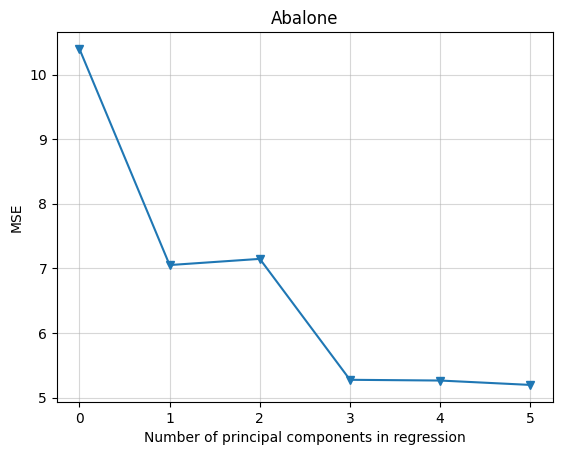

In [284]:
# dataframe to numpy
y = df_combined['Rings'].values

# samples, principal components
n, pc = X_reduced.shape

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold(n_splits = 10, shuffle = True, random_state = 1)
model = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1 * model_selection.cross_val_score(model, np.ones((n, 1)), y.ravel(),
                                             cv = kf_10,
                                             scoring = 'neg_mean_squared_error').mean()

mse.append(score)

# Calculate MSE using CV for the 16 principle components, adding one component at the time
for i in np.arange(1, pc+1):
  score = -1 * model_selection.cross_val_score(model, X_reduced[:, :i], y.ravel(),
                                               cv = kf_10,
                                               scoring = 'neg_mean_squared_error').mean()
  mse.append(score)

x_axis = np.arange(0, len(mse))

# Plot results
plt.plot(x_axis, mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Abalone')
plt.grid(alpha = 0.5)

###Después realizamos el PCA en los datos de entrenamiento

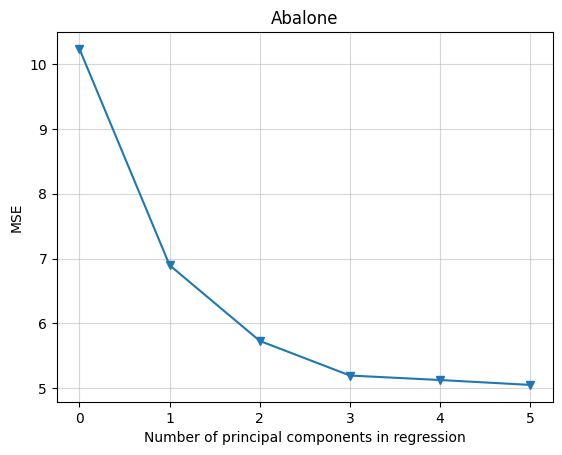

In [285]:
pca2 = PCA()

# Split into training and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                                                    test_size = 0.5,
                                                                    random_state = 1)

# Scale the data
X_reduced_train = pca2.fit_transform(scale(X_train))
n, pc = X_reduced_train.shape

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold(n_splits = 10, shuffle = True, random_state = 1)
model = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1 * model_selection.cross_val_score(model, np.ones((n, 1)), y_train.ravel(),
                                             cv = kf_10,
                                             scoring = 'neg_mean_squared_error').mean()

mse.append(score)

# Calculate MSE using CV for the 16 principle components, adding one component at the time
for i in np.arange(1, pc+1):
  score = -1 * model_selection.cross_val_score(model, X_reduced_train[:, :i], y_train.ravel(),
                                               cv = kf_10,
                                               scoring = 'neg_mean_squared_error').mean()
  mse.append(score)

x_axis = np.arange(0, len(mse))

# Plot results
plt.plot(x_axis, mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Abalone')
plt.grid(alpha = 0.5)

###Obtenga de nuevo los valores de R^2 y MSE de esta aproximación

In [286]:
X_reduced_test = pca2.transform(scale(X_test))[:, :5]

model = sm.OLS(y_train, sm.add_constant(X_reduced_train[:, :5]))
fitted_model = model.fit()

# Prediction with test data
pred = fitted_model.predict(sm.add_constant(X_reduced_test))
mse = mean_squared_error(y_test, pred)

print('Mean squared error: {}'.format(np.round(mse, 2)))

Mean squared error: 5.27


In [287]:
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     432.6
Date:                Sat, 21 Oct 2023   Prob (F-statistic):          7.70e-319
Time:                        00:01:29   Log-Likelihood:                -4646.4
No. Observations:                2088   AIC:                             9305.
Df Residuals:                    2082   BIC:                             9339.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.8793      0.049    201.267      0.0

##¿Mejoro el valor de R^2 y MSE del modelo PCR respecto al metodo de VIF?¿A que se lo adjudica?

El valor de R^2 en el modelo PCR no presentó mejoras en comparación con el método de VIF, manteniéndose constante en 0.510, y el MSE del modelo PCR es ligeramente superior.Sin embargo, se observa una mejora en la interpretación de los resultados del PCR, ya que los valores negativos de los coeficientes son mejores y todos los p-valores son muy bajos (0.0). Esto sugiere que el PCR podría estar abordando la multicolinealidad en los datos, lo que es esencial para una interpretación más sólida de los coeficientes. Aunque las métricas de ajuste del modelo no cambiaron, la mejora en la interpretabilidad y estabilidad del modelo podrían hacer que el PCR sea una mejor opción.